Aluno: Gabriel Barros Teixeira  
Atividades de PCA E LDA e Sitemas de recomendaçao

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [20]:
# Carregar o conjunto de dados Iris
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [23]:
# Padronizar os dados
scaler = StandardScaler()
X_std = scaler.fit_transform(x)

# Matriz de covariância
cov_matrix = np.cov(X_std.T)

# Autovalores e autovetores
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [25]:
# Ordenar autovalores e autovetores
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Selecionar as 2 primeiras componentes principais
matrix_w = np.hstack((eig_pairs[0][1].reshape(4, 1), eig_pairs[1][1].reshape(4, 1)))


Text(0, 0.5, 'Feature 2')

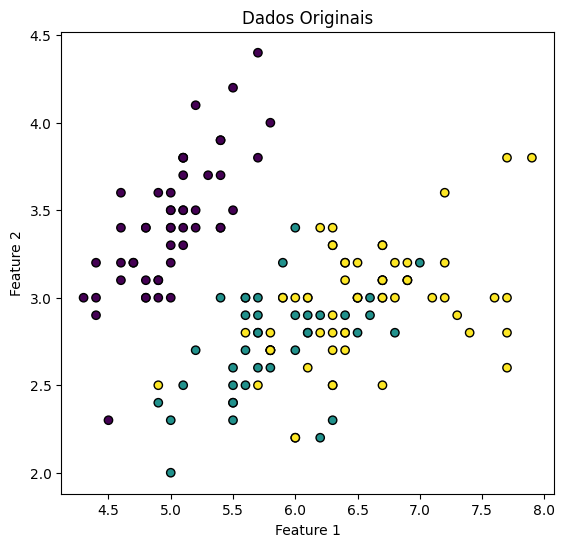

In [27]:
# Projeção dos dados
X_pca = X_std.dot(matrix_w)

# Visualizar os dados
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Dados Originais')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0, 0.5, 'Componente Principal 2')

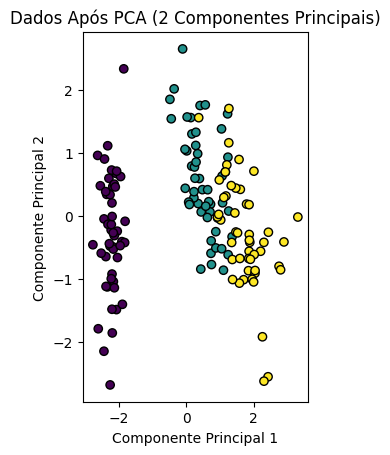

In [28]:
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Dados Após PCA (2 Componentes Principais)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

## Exercício 2

In [29]:
from sklearn.decomposition import PCA


In [30]:
# Carregar o conjunto de dados Iris
X = iris.data

# Aplicar o PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

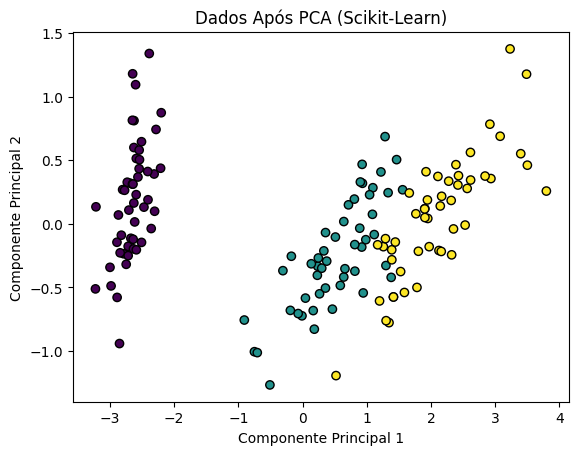

In [31]:
# Visualizar os dados
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Dados Após PCA (Scikit-Learn)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

## Exercício 3

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [33]:
# Carregar o conjunto de dados Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_labels = np.unique(y)

In [34]:
# Calcular as médias das classes
mean_overall = np.mean(X, axis=0)
mean_vectors = [np.mean(X[y == cls], axis=0) for cls in class_labels]

In [35]:
# Matriz intra-classe e entre-classe
S_W = np.zeros((X.shape[1], X.shape[1]))
S_B = np.zeros((X.shape[1], X.shape[1]))
for i, mean_vec in enumerate(mean_vectors):
    class_scatter = np.cov(X[y == i].T)
    S_W += class_scatter
    n = X[y == i, :].shape[0]
    mean_diff = (mean_vec - mean_overall).reshape(X.shape[1], 1)
    S_B += n * (mean_diff).dot(mean_diff.T)


In [36]:
# Autovalores e autovetores
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [37]:
# Ordenar autovalores
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Selecionar os dois maiores autovetores
W = np.hstack((eig_pairs[0][1].reshape(X.shape[1], 1), eig_pairs[1][1].reshape(X.shape[1], 1)))

# Projeção dos dados
X_lda = X.dot(W)

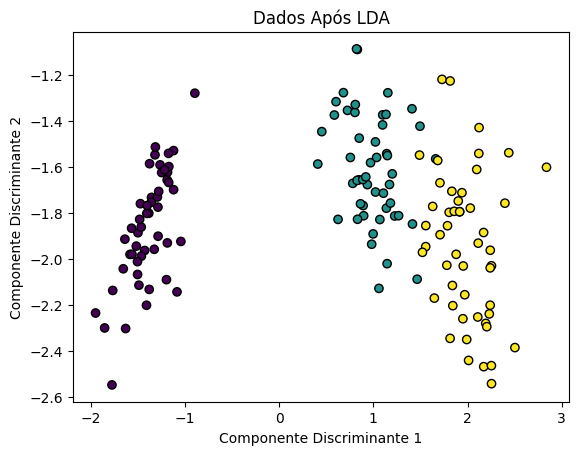

In [38]:
# Visualizar os dados
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Dados Após LDA')
plt.xlabel('Componente Discriminante 1')
plt.ylabel('Componente Discriminante 2')
plt.show()

## Exercício 4

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [41]:
#Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar o LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [42]:
# Avaliar a precisão
y_pred = lda.predict(X_test)
print("Precisão do LDA:", accuracy_score(y_test, y_pred))

Precisão do LDA: 1.0


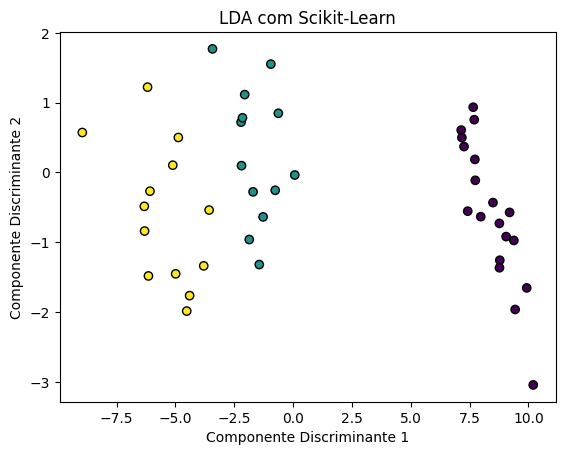

In [43]:
# Visualização
plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c=y_test, cmap='viridis', edgecolor='k')
plt.title('LDA com Scikit-Learn')
plt.xlabel('Componente Discriminante 1')
plt.ylabel('Componente Discriminante 2')
plt.show()

## Exercício 5

In [44]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [45]:
# Conjunto de dados de avaliações (usuário x item)
ratings = np.array([[4, 0, 0, 5, 1, 0, 3],
                    [5, 5, 4, 0, 0, 0, 2],
                    [0, 0, 0, 2, 4, 5, 0],
                    [3, 4, 0, 0, 0, 0, 1]])

# Filtragem colaborativa baseada em usuários
user_similarity = cosine_similarity(ratings)
user_prediction = user_similarity.dot(ratings) / np.array([np.abs(user_similarity).sum(axis=1)]).T

# Filtragem colaborativa baseada em itens
item_similarity = cosine_similarity(ratings.T)
item_prediction = ratings.dot(item_similarity) / np.array([np.abs(item_similarity).sum(axis=1)])


In [46]:
print("Predição baseada em usuários:\n", user_prediction)
print("Predição baseada em itens:\n", item_prediction)

Predição baseada em usuários:
 [[3.46444152 1.78723433 0.81362557 2.61040437 1.01385373 0.68301785
  2.00168172]
 [4.0576373  3.67834131 1.73728466 0.94497482 0.18899496 0.
  1.81231109]
 [0.90459498 0.         0.         2.67844623 3.32155377 3.86925628
  0.67844623]
 [3.94177541 3.65759696 1.52208827 0.90365638 0.18073128 0.
  1.74198462]]
Predição baseada em itens:
 [[2.32306559 1.57799216 1.46633495 3.07440548 1.75237897 1.20736956
  2.67228224]
 [3.34110179 4.20377503 4.1386041  1.27535935 0.37229216 0.
  2.94412405]
 [0.38707354 0.         0.         1.92122429 3.47096518 4.10985052
  0.56630031]
 [1.74596325 2.21088005 1.91209983 0.71907104 0.20990516 0.
  1.54199857]]


## Exercíco 6


In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [48]:
# Conjunto de dados de produtos (Exemplo: e-commerce)
data = {'Produto': ['Camiseta Azul', 'Camiseta Vermelha', 'Calça Jeans', 'Jaqueta Preta'],
        'Descrição': ['camiseta em algodão azul', 'camiseta de algodão vermelha', 'calça jeans azul', 'jaqueta preta de couro']}

df = pd.DataFrame(data)


In [49]:
# Vetorização TF-IDF das descrições dos produtos
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['Descrição'])

# Similaridade de cosseno entre os produtos
similaridade = cosine_similarity(tfidf_matrix)


In [50]:
# Função de recomendação
def recomendar_produto(produto, similaridade, df):
    idx = df[df['Produto'] == produto].index[0]
    similaridades_produto = list(enumerate(similaridade[idx]))
    similaridades_produto = sorted(similaridades_produto, key=lambda x: x[1], reverse=True)
    produtos_recomendados = [df['Produto'][i[0]] for i in similaridades_produto[1:3]]
    return produtos_recomendados


In [51]:
# Exemplo de recomendação
print(recomendar_produto('Camiseta Azul', similaridade, df))

['Camiseta Vermelha', 'Calça Jeans']
